In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')
data

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.shape

(891, 13)

In [6]:
data.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_new=data.drop(columns=['Name','Ticket','Cabin','Embarked'])
data_new['Sex'] = data_new['Sex'].replace({'male':1,'female':0})
data_new

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,0,3,1,22.0,1,0,7.2500
1,1,2,1,1,0,38.0,1,0,71.2833
2,2,3,1,3,0,26.0,0,0,7.9250
3,3,4,1,1,0,35.0,1,0,53.1000
4,4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,1,27.0,0,0,13.0000
887,887,888,1,1,0,19.0,0,0,30.0000
888,888,889,0,3,0,NaN,1,2,23.4500
889,889,890,1,1,1,26.0,0,0,30.0000


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [10]:
ohe=OneHotEncoder()
SI=SimpleImputer()

In [11]:
ct = make_column_transformer((SI,['Age']),remainder='passthrough')

In [12]:
encoded=pd.DataFrame(ct.fit_transform(data_new))
encoded

,0,1,2,3,4,5,6,7,8
0,22.000000,0.0,1.0,0.0,3.0,1.0,1.0,0.0,7.2500
1,38.000000,1.0,2.0,1.0,1.0,0.0,1.0,0.0,71.2833
2,26.000000,2.0,3.0,1.0,3.0,0.0,0.0,0.0,7.9250
3,35.000000,3.0,4.0,1.0,1.0,0.0,1.0,0.0,53.1000
4,35.000000,4.0,5.0,0.0,3.0,1.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,27.000000,886.0,887.0,0.0,2.0,1.0,0.0,0.0,13.0000
887,19.000000,887.0,888.0,1.0,1.0,0.0,0.0,0.0,30.0000
888,29.699118,888.0,889.0,0.0,3.0,0.0,1.0,2.0,23.4500
889,26.000000,889.0,890.0,1.0,1.0,1.0,0.0,0.0,30.0000


In [13]:
encoded.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [14]:
encoded=pd.DataFrame(ct.fit_transform(data_new), columns=['Age','Unnamed','PassengerId','Survived','Pclass','Sex','Sibsp','Parch','Fare'])
encoded

,Age,Unnamed,PassengerId,Survived,Pclass,Sex,Sibsp,Parch,Fare
0,22.000000,0.0,1.0,0.0,3.0,1.0,1.0,0.0,7.2500
1,38.000000,1.0,2.0,1.0,1.0,0.0,1.0,0.0,71.2833
2,26.000000,2.0,3.0,1.0,3.0,0.0,0.0,0.0,7.9250
3,35.000000,3.0,4.0,1.0,1.0,0.0,1.0,0.0,53.1000
4,35.000000,4.0,5.0,0.0,3.0,1.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,27.000000,886.0,887.0,0.0,2.0,1.0,0.0,0.0,13.0000
887,19.000000,887.0,888.0,1.0,1.0,0.0,0.0,0.0,30.0000
888,29.699118,888.0,889.0,0.0,3.0,0.0,1.0,2.0,23.4500
889,26.000000,889.0,890.0,1.0,1.0,1.0,0.0,0.0,30.0000


In [15]:
encoded_new=encoded.drop(columns=['Unnamed'])
encoded_new

,Age,PassengerId,Survived,Pclass,Sex,Sibsp,Parch,Fare
0,22.000000,1.0,0.0,3.0,1.0,1.0,0.0,7.2500
1,38.000000,2.0,1.0,1.0,0.0,1.0,0.0,71.2833
2,26.000000,3.0,1.0,3.0,0.0,0.0,0.0,7.9250
3,35.000000,4.0,1.0,1.0,0.0,1.0,0.0,53.1000
4,35.000000,5.0,0.0,3.0,1.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,27.000000,887.0,0.0,2.0,1.0,0.0,0.0,13.0000
887,19.000000,888.0,1.0,1.0,0.0,0.0,0.0,30.0000
888,29.699118,889.0,0.0,3.0,0.0,1.0,2.0,23.4500
889,26.000000,890.0,1.0,1.0,1.0,0.0,0.0,30.0000


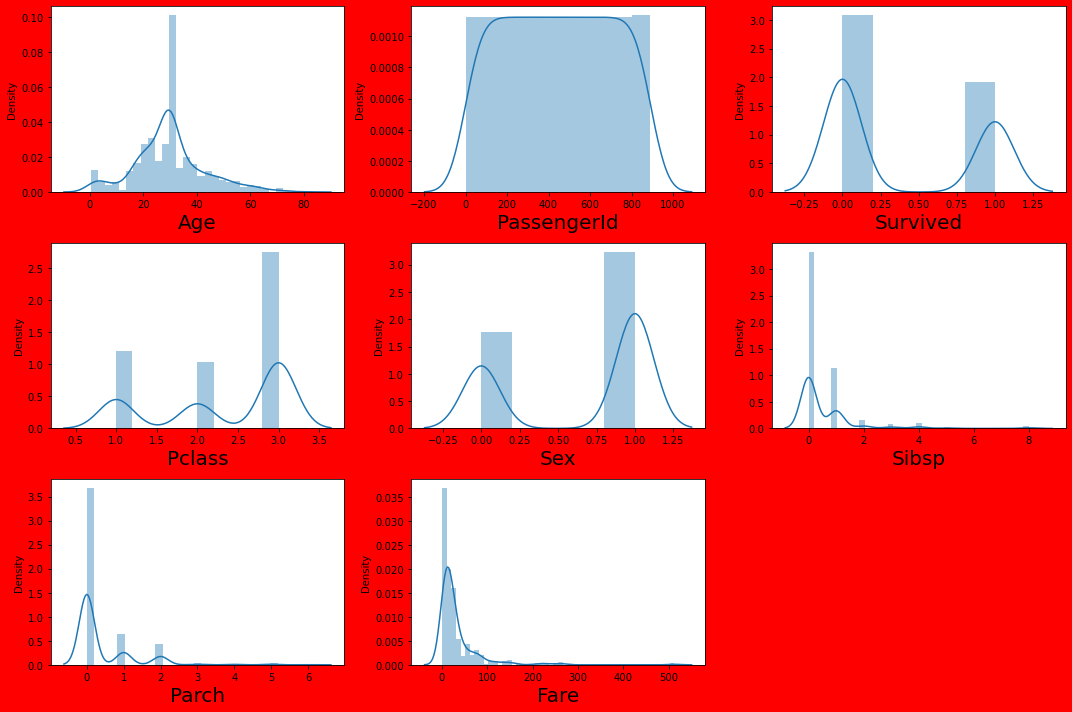

In [16]:
plt.figure(figsize=(15,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in encoded_new:#triggering your for loop
    if plotnumber<=8:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(encoded_new[column])#performing a distribution plot for all the columns starting with pregnancies
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use 

In [17]:
#Step 4 - replacing zero values with the mean of the column
encoded_new['Age']=encoded_new['Age'].replace(0,encoded_new['Age'].mean())
encoded_new['Sibsp']=encoded_new['Sibsp'].replace(0,encoded_new['Sibsp'].mean())
encoded_new['Parch']=encoded_new['Parch'].replace(0,encoded_new['Parch'].mean())
encoded_new['Fare']=encoded_new['Fare'].replace(0,encoded_new['Fare'].mean())

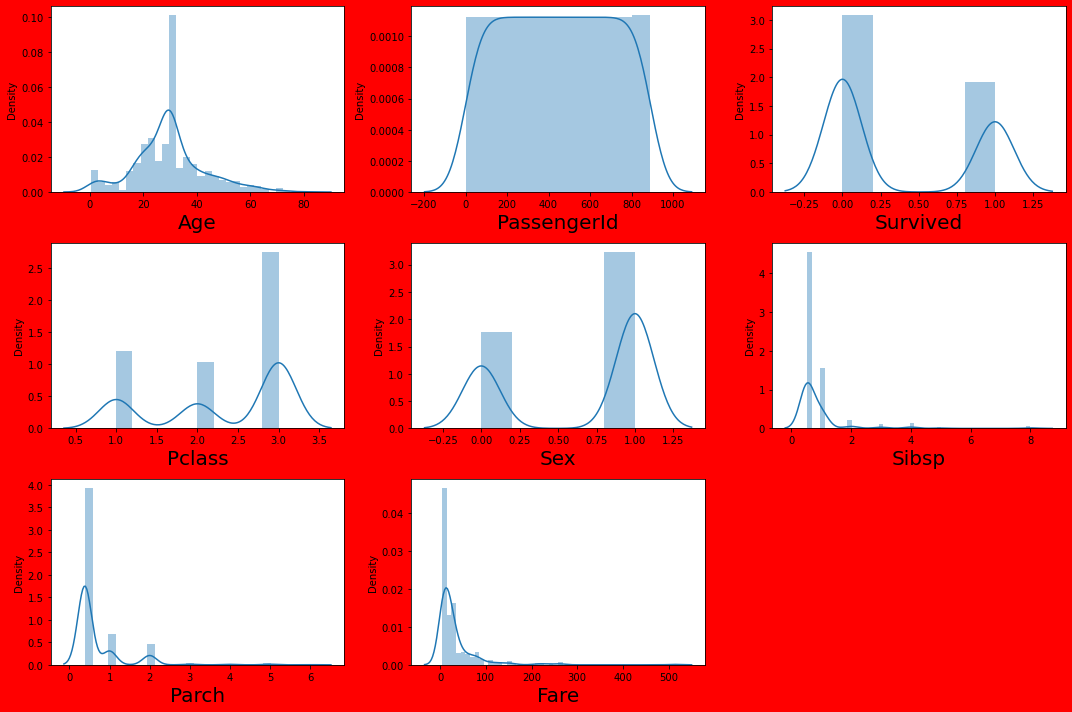

In [18]:
plt.figure(figsize=(15,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in encoded_new:#triggering your for loop
    if plotnumber<=8:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(encoded_new[column])#performing a distribution plot for all the columns starting with pregnancies
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use 

In [19]:
df_features=encoded_new.drop(columns=['Survived'], axis=1)#The idea here is to still maintain your 
df_features.head(3)

,Age,PassengerId,Pclass,Sex,Sibsp,Parch,Fare
0,22.0,1.0,3.0,1.0,1.000000,0.381594,7.2500
1,38.0,2.0,1.0,0.0,1.000000,0.381594,71.2833
2,26.0,3.0,3.0,0.0,0.523008,0.381594,7.9250


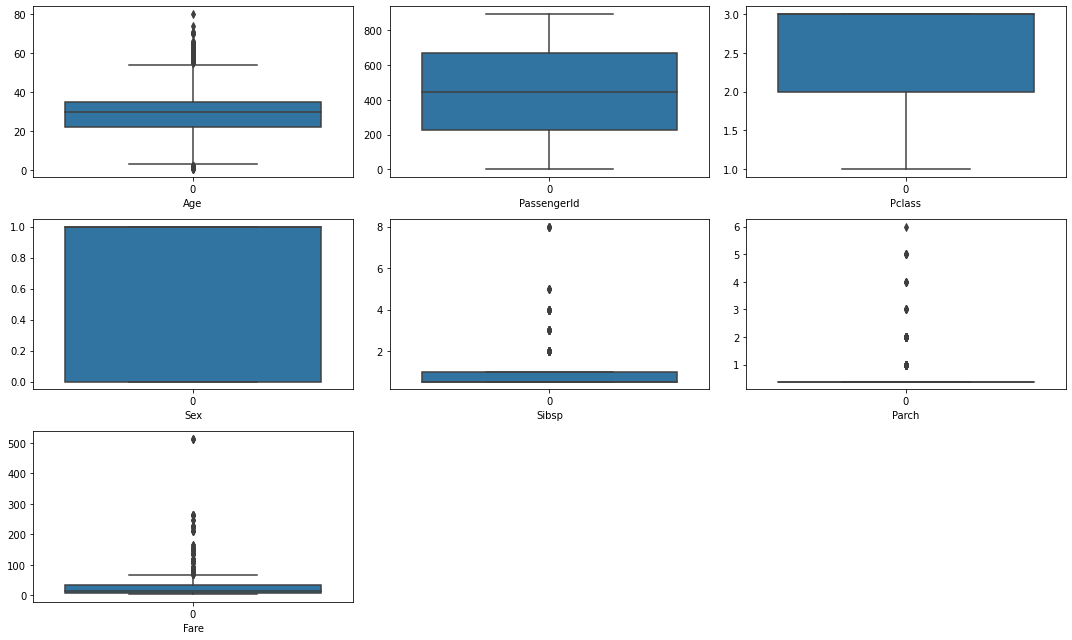

In [20]:
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_features:#triggering your for loop
    if graph<=9:#this was made 9 just to allow for 9 spaces but its actaully 8 plots
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_features[column])#performing a box plot starting with pregnancies
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use plt.show()

In [21]:
Q1 = encoded_new.quantile(0.25)#We using the original data set here

#3rd Quantile
Q3 = encoded_new.quantile(0.75)#We using the original data set here

#IQR(Interquantile range)
IQR=Q3-Q1
IQR

Age             13.000000
PassengerId    445.000000
Survived         1.000000
Pclass           1.000000
Sex              1.000000
Sibsp            0.476992
Parch            0.000000
Fare            24.279208
dtype: float64

In [22]:
#OUTLIER DETECTION FORMULAR
#Higher Side = Q3+(1.5*IQR)
#Lower Side = Q1-(1.5*IQR)

In [23]:
#Removal of Age Outliers
#Also note that Age have both higher Side and Lower side, hence our concern is on both
Age_high=(Q3.Age+(1.5*IQR.Age))#Using the higher Side formular and storing in preg_high
Age_high

54.5

In [24]:
Age_low=(Q1.Age-(1.5*IQR.Age))#Using the higher Side formular and storing in preg_high
Age_low

2.5

In [25]:
index_Age=np.where(encoded_new['Age']>Age_high)
index_Age

(array([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
        268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
        555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
        829, 851, 879], dtype=int64),)

In [26]:
#Next is to drop or remove those indexes(higher-side outliers)
encoded_new=encoded_new.drop(encoded_new.index[index_Age])#using the 'data.index' method
encoded_new.shape#checking if the 4 rows(i.e. index_preg) have been dropped

(849, 8)

In [27]:
index_Age_low=np.where(encoded_new['Age']<Age_low)
index_Age_low

(array([  7,  14,  74, 112, 156, 163, 173, 194, 281, 289, 323, 363, 368,
        448, 458, 505, 610, 612, 717, 749, 764, 785, 788, 791], dtype=int64),)

In [28]:
encoded_new=encoded_new.drop(encoded_new.index[index_Age_low])#using the 'data.index' method
encoded_new.shape

(825, 8)

In [29]:
#Removal of Sibsp Outliers
#Also note that Sibsp have both higher Side and Lower side, hence our concern is on both
Sibsp_high=(Q3.Sibsp+(1.5*IQR.Sibsp))#Using the higher Side formular and storing in preg_high
Sibsp_high

1.7154882154882156

In [30]:
index_Sibsp=np.where(encoded_new['Sibsp']>Sibsp_high)
index_Sibsp

(array([ 20,  23,  33,  43,  45,  53,  57,  62,  63,  65,  78,  81,  95,
        109, 136, 147, 157, 160, 164, 166, 183, 210, 213, 225, 240, 245,
        255, 276, 285, 298, 303, 306, 313, 345, 361, 378, 405, 406, 416,
        444, 448, 489, 500, 501, 522, 527, 555, 573, 586, 604, 608, 613,
        630, 632, 671, 687, 729, 733, 753, 759, 782, 786, 795, 798],
       dtype=int64),)

In [31]:
encoded_new=encoded_new.drop(encoded_new.index[index_Sibsp])#using the 'data.index' method
encoded_new.shape#checking if the 4 rows(i.e. index_preg) have been dropped

(761, 8)

In [32]:
Parch_high=(Q3.Sibsp+(1.5*IQR.Parch))#Using the higher Side formular and storing in preg_high
Parch_high

1.0

In [33]:
index_Parch=np.where(encoded_new['Parch']>Parch_high)
index_Parch

(array([  7,  11,  20,  35,  47,  68,  74, 111, 115, 122, 126, 136, 138,
        147, 194, 203, 209, 210, 263, 299, 314, 325, 328, 350, 352, 368,
        375, 379, 398, 417, 425, 450, 452, 456, 457, 464, 479, 495, 502,
        516, 518, 523, 541, 573, 578, 626, 642, 650, 660, 669, 685, 731,
        755, 758], dtype=int64),)

In [34]:
encoded_new=encoded_new.drop(encoded_new.index[index_Parch])#using the 'data.index' method
encoded_new.shape

(707, 8)

In [35]:
Fare_high=(Q3.Fare+(1.5*IQR.Fare))#Using the higher Side formular and storing in preg_high
Fare_high

68.62301992143651

In [36]:
index_Fare=np.where(encoded_new['Fare']>Fare_high)
index_Fare

(array([  1,  22,  24,  38,  44,  45,  51,  74,  88,  92, 106, 161, 164,
        170, 175, 193, 194, 195, 198, 203, 221, 222, 229, 234, 235, 238,
        245, 250, 255, 256, 259, 287, 291, 292, 296, 300, 305, 322, 354,
        378, 379, 386, 393, 394, 408, 415, 421, 424, 434, 435, 454, 462,
        477, 490, 501, 503, 530, 532, 536, 544, 546, 554, 562, 575, 581,
        585, 599, 604, 616, 623, 649, 660, 673, 678], dtype=int64),)

In [37]:
encoded_new=encoded_new.drop(encoded_new.index[index_Fare])#using the 'data.index' method
encoded_new.shape

(633, 8)

In [38]:
encoded_new

,Age,PassengerId,Survived,Pclass,Sex,Sibsp,Parch,Fare
0,22.000000,1.0,0.0,3.0,1.0,1.000000,0.381594,7.2500
2,26.000000,3.0,1.0,3.0,0.0,0.523008,0.381594,7.9250
3,35.000000,4.0,1.0,1.0,0.0,1.000000,0.381594,53.1000
4,35.000000,5.0,0.0,3.0,1.0,0.523008,0.381594,8.0500
5,29.699118,6.0,0.0,3.0,1.0,0.523008,0.381594,8.4583
...,...,...,...,...,...,...,...,...
884,25.000000,885.0,0.0,3.0,1.0,0.523008,0.381594,7.0500
886,27.000000,887.0,0.0,2.0,1.0,0.523008,0.381594,13.0000
887,19.000000,888.0,1.0,1.0,0.0,0.523008,0.381594,30.0000
889,26.000000,890.0,1.0,1.0,1.0,0.523008,0.381594,30.0000


In [39]:
df_features_1=encoded_new.drop(columns=['Survived'], axis=1)#The idea here is to still maintain your 
df_features_1.head(3)

,Age,PassengerId,Pclass,Sex,Sibsp,Parch,Fare
0,22.0,1.0,3.0,1.0,1.000000,0.381594,7.250
2,26.0,3.0,3.0,0.0,0.523008,0.381594,7.925
3,35.0,4.0,1.0,0.0,1.000000,0.381594,53.100


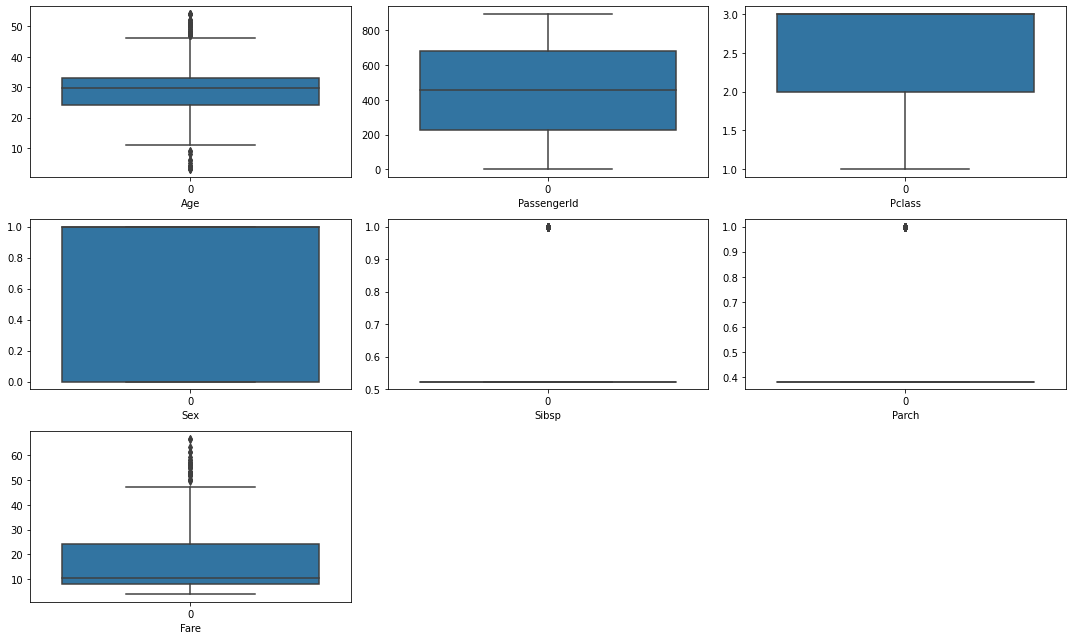

In [40]:
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_features_1:#triggering your for loop
    if graph<=9:#this was made 9 just to allow for 9 spaces but its actaully 8 plots
        plt.subplot(3,3,graph)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_features_1[column])#performing a box plot starting with pregnancies
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use plt.show()

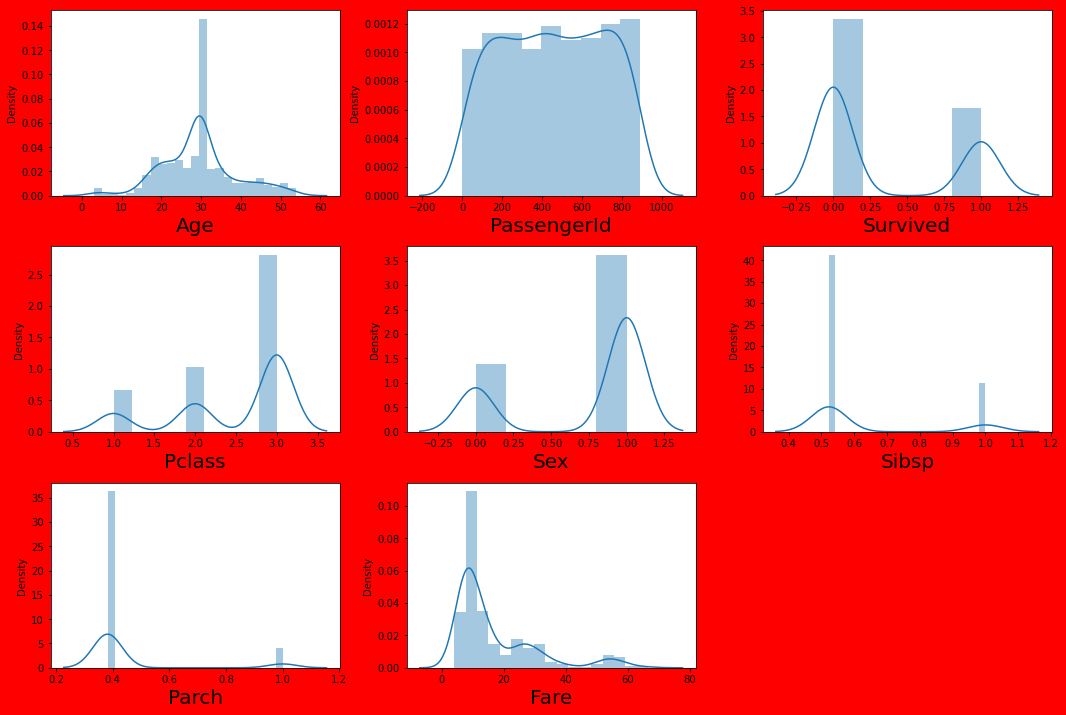

In [41]:
plt.figure(figsize=(15,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in encoded_new:#triggering your for loop
    if plotnumber<=9:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(encoded_new[column])#performing a distribution plot for all the columns starting with pregnancies
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use plt.show

In [42]:
X=encoded_new.drop(columns=['Survived'])
Y=encoded_new['Survived']

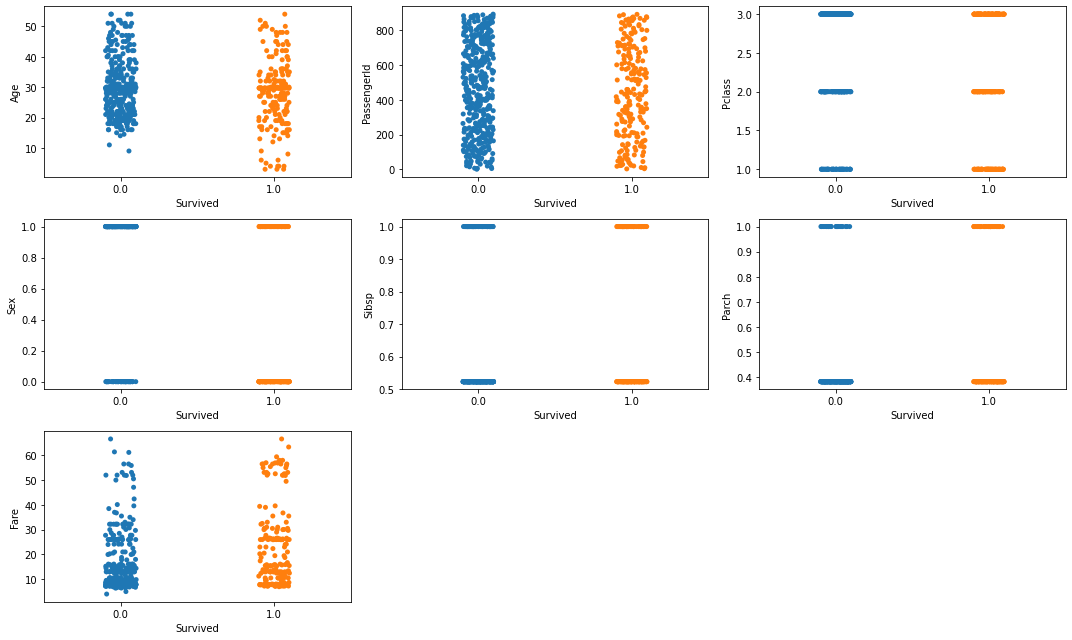

In [43]:
plt.figure(figsize=(15,9))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in X:#triggering  your for loop
    if plotnumber<=9:#since there are 9 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
plt.tight_layout()#This is just to show you data in a compact form. You can also use plt.show()

In [44]:
encoded_new=encoded_new.drop(columns=['Sibsp','Parch','Sex','Pclass'])
encoded_new

,Age,PassengerId,Survived,Fare
0,22.000000,1.0,0.0,7.2500
2,26.000000,3.0,1.0,7.9250
3,35.000000,4.0,1.0,53.1000
4,35.000000,5.0,0.0,8.0500
5,29.699118,6.0,0.0,8.4583
...,...,...,...,...
884,25.000000,885.0,0.0,7.0500
886,27.000000,887.0,0.0,13.0000
887,19.000000,888.0,1.0,30.0000
889,26.000000,890.0,1.0,30.0000


In [45]:
X=encoded_new.drop(columns=['Survived'])
Y=encoded_new['Survived']

In [46]:
X

,Age,PassengerId,Fare
0,22.000000,1.0,7.2500
2,26.000000,3.0,7.9250
3,35.000000,4.0,53.1000
4,35.000000,5.0,8.0500
5,29.699118,6.0,8.4583
...,...,...,...
884,25.000000,885.0,7.0500
886,27.000000,887.0,13.0000
887,19.000000,888.0,30.0000
889,26.000000,890.0,30.0000


In [47]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.79471594, -1.75680866, -0.71425147],
       [-0.35830767, -1.74906546, -0.66402395],
       [ 0.62361092, -1.74519385,  2.69749947],
       ...,
       [-1.12202213,  1.67730319,  0.97860205],
       [-0.35830767,  1.68504639,  0.97860205],
       [ 0.29630473,  1.68891799, -0.6770459 ]])

In [48]:
X_Scaled.shape

(633, 3)

In [49]:
vif=pd.DataFrame()#creating an empty dataframe stored in vif
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#this is a list comprehension and it means in the for loop, the range(X_Scaled.shape[1]) also means range(8) or (0,1,2,3,4,5,6,7) since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 8. Now all the columns in X_Scaled which is (0,1,2,3,4,5,6,7) will now be compared with the entire X_Scaled one by one using the variance_inflation_factor(X_Scaled, i). The output of this list comprehension is then stored in a column named 'vif' inside the empty vif dataframe created above
vif['Features'] = X.columns #creating another column named 'features' inside the empty vif Dataframe created earlier and populating it with a data calle X.columns
vif

,vif,Features
0,1.050032,Age
1,1.000227,PassengerId
2,1.050194,Fare


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_Scaled,Y,test_size = 0.25, random_state=355)

In [51]:
log_reg = LogisticRegression()#instantiating the logistic Regression i.e. giving it a short abbreviation - log_reg or user can name according to his/her choice(user defined)
log_reg.fit(x_train,y_train)#

LogisticRegression()

In [52]:
y_pred=log_reg.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [53]:
encoded_new.tail(3)

,Age,PassengerId,Survived,Fare
887,19.0,888.0,1.0,30.00
889,26.0,890.0,1.0,30.00
890,32.0,891.0,0.0,7.75


In [54]:
log_reg.predict(scalar.transform([[19.0,888.0,30.00]]))

array([1.])

In [55]:
log_reg.predict(scalar.transform([[26.0,890.0,30.00]]))

array([0.])

In [56]:
log_reg.predict(scalar.transform([[32.0,891.0,7.75]]))

array([0.])

In [57]:
#Checking for model accuracy; recal the metrics discussed earlier
accuracy = accuracy_score(y_test,y_pred)#Also note the argument passed is ony the Label values and not features
accuracy

0.6918238993710691

In [58]:
conf_mat = confusion_matrix(y_test,y_pred)#Also note the argument passed is ony the Label values and not features
conf_mat

array([[102,   8],
       [ 41,   8]], dtype=int64)

In [59]:
#Calculating ACCURACY Manually....
TP=102
FN=41
FP=8
TN=8
print((TP+TN)/(TP+FN+FP+TN))

0.6918238993710691


In [60]:
R= (TP)/(TP+FN)
P= (TP)/(TP+FP)
print('Recall = ',R)
print('Precision = ',P)
print('F1Score = ',(2*P*R)/(P+R))

Recall =  0.7132867132867133
Precision =  0.9272727272727272
F1Score =  0.8063241106719368


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.93      0.81       110
         1.0       0.50      0.16      0.25        49

    accuracy                           0.69       159
   macro avg       0.61      0.55      0.53       159
weighted avg       0.65      0.69      0.63       159



In [63]:
import pickle

In [65]:
pickle.dump(LogisticRegression,open('Reg_Model_titanic','wb'))#Reg_Model_titanic is user defined

In [ ]:
#You can check your JN Home page for the file named "Reg_Model_titanic"